In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [13]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [16]:
y = df['salario']
X= df.drop(['salario', 'noasiat',  'postgrad',], axis =1 )
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [17]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()
#OLS = Ordinary list squares

In [23]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           7.37e-38
Time:                        20:45:10   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

Los modelos de regresion deben checar 3 cosas
* que el error se distribuya normal

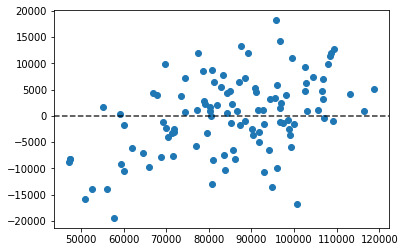

In [29]:
fig, ax = plt.subplots()
y_pred  = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y - y_pred)

plt.axhline(y=0, color='black', alpha = 0.8, linestyle = '--')

### Vamos continuar con el analisis a compensasion a ejecutivos

In [30]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [31]:
## Vamos a generar una distribucion de los cuartiles del salario
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [32]:
y = np.where(df['salario'] > 96000,1,0)
x = df.drop(['salario'], axis = 1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

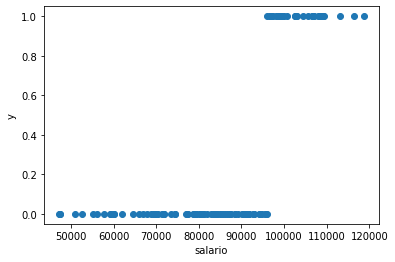

In [33]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('salario')
ax.set_ylabel('y')

In [42]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(x, y)
y_estimado_1 = reg_log.predict_proba(x)[:,1]
y_estimado = reg_log.predict(x)

In [43]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [48]:
metrics.accuracy_score(y, reg_log.predict(x))

0.9090909090909091

In [49]:
x.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')